In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.4.1'

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5619202231447908837
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14674281152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1465201529488542063
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [7]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices()))

Num GPUs Available:  2


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from tensorflow.python.keras import backend as K

# adjust values to your needs
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 2 , 'CPU': 8} )
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset_train = pd.read_csv('/content/drive/MyDrive/HPC/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [17]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [18]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [21]:
 #Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [23]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [24]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [25]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [40]:
import time
import keras

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [41]:
time_callback = TimeHistory()

In [42]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32 , callbacks=[time_callback])

Epoch 1/100
62/62 [==============================] - 6s 14ms/step - loss: 0.3119
Epoch 2/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0064
Epoch 3/100
62/62 [==============================] - 1s 12ms/step - loss: 0.0049
Epoch 4/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0044
Epoch 5/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0041
Epoch 6/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 7/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 8/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0032
Epoch 9/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0042
Epoch 10/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0028
Epoch 11/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0031
Epoch 12/100
62/62 [==============================] - 1s 13ms/step - loss: 0.0026
Epoch 13/100
62/62 [=====

In [43]:
print(time_callback.times)

[5.564037084579468, 0.7847108840942383, 0.7624664306640625, 0.8061678409576416, 0.7899136543273926, 0.7853636741638184, 0.7930929660797119, 0.8156700134277344, 0.7936887741088867, 0.7972588539123535, 0.8046045303344727, 0.8126840591430664, 0.8042428493499756, 0.7920405864715576, 0.7988297939300537, 0.8032951354980469, 0.788569450378418, 0.7851438522338867, 0.7805628776550293, 0.7826273441314697, 0.8074688911437988, 0.7852060794830322, 0.7811739444732666, 0.8110532760620117, 0.8024134635925293, 0.789794921875, 0.7819995880126953, 0.7620711326599121, 0.7526929378509521, 0.746708869934082, 0.7838373184204102, 0.7602624893188477, 0.7801263332366943, 0.7829909324645996, 0.7584831714630127, 0.7327256202697754, 0.7814750671386719, 0.7846682071685791, 0.7545905113220215, 0.7474365234375, 0.7667160034179688, 0.7486042976379395, 0.7734131813049316, 0.7482752799987793, 0.786245584487915, 0.7959740161895752, 0.753873348236084, 0.7574589252471924, 0.7746646404266357, 0.7548089027404785, 0.747466802

In [27]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/HPC/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [28]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [29]:
predicted_stock_price

array([[120.39415],
       [183.53946],
       [218.36922],
       [225.2728 ],
       [223.17043],
       [226.87599],
       [230.42807],
       [227.99707],
       [224.44092],
       [216.64046],
       [212.95282],
       [212.54646],
       [208.08112],
       [210.42416],
       [216.14386],
       [222.0818 ]], dtype=float32)

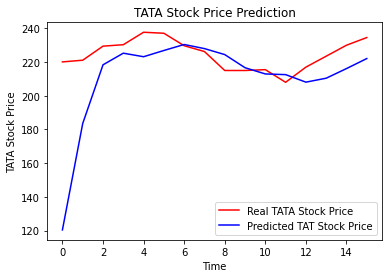

In [30]:
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [38]:
history.history.keys()

dict_keys(['loss'])

In [45]:
type(time_callback.times)

list

In [50]:
left = []
for i in range(len(time_callback.times)):
  left.append(i+1)

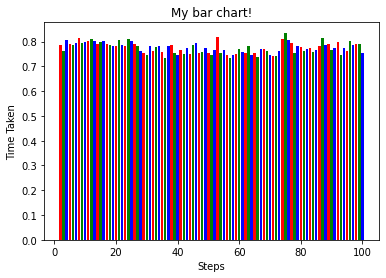

In [53]:
import matplotlib.pyplot as plt

# left = [1, 2, 3, 4, 5]

height = time_callback.times
  
# labels for bars
# tick_label = ['one', 'two', 'three', 'four', 'five']
  
# plotting a bar chart
plt.bar( left[1:],height[1:],width = 0.8, color = ['red', 'green', "blue"])
  
# naming the x-axis
plt.xlabel('Steps')
# naming the y-axis
plt.ylabel('Time Taken')
# plot title
plt.title('My bar chart!')
  
# function to show the plot
plt.show()

In [54]:
print("Average = " , sum(time_callback.times)/len(time_callback.times))

Average =  0.8234196615219116


In [71]:
epochs = [50,100,150,200,250,300]
batch_size = [8,16,32,64,128,256]

In [72]:
# # Adding the output layer
# regressor.add(Dense(units = 1))

# # Compiling the RNN
# regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# # Fitting the RNN to the Training set
# history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32 , callbacks=[time_callback])

In [73]:
time_epochs = []

In [74]:
import time
for i in epochs:
  start_time = time.time()
  # Adding the output layer
  regressor.add(Dense(units = 1))

  # Compiling the RNN
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

  # Fitting the RNN to the Training set
  history = regressor.fit(X_train, y_train, epochs = i, batch_size = 32 )
  time_epochs.append(time.time() - start_time)

Epoch 1/50
62/62 [==============================] - 6s 14ms/step - loss: 0.0012
Epoch 2/50
62/62 [==============================] - 1s 13ms/step - loss: 6.0321e-04
Epoch 3/50
62/62 [==============================] - 1s 13ms/step - loss: 4.9156e-04
Epoch 4/50
62/62 [==============================] - 1s 13ms/step - loss: 7.0012e-04
Epoch 5/50
62/62 [==============================] - 1s 12ms/step - loss: 4.9844e-04
Epoch 6/50
62/62 [==============================] - 1s 13ms/step - loss: 4.5502e-04
Epoch 7/50
62/62 [==============================] - 1s 14ms/step - loss: 5.0851e-04
Epoch 8/50
62/62 [==============================] - 1s 13ms/step - loss: 4.7852e-04
Epoch 9/50
62/62 [==============================] - 1s 13ms/step - loss: 6.2959e-04
Epoch 10/50
62/62 [==============================] - 1s 13ms/step - loss: 5.2967e-04
Epoch 11/50
62/62 [==============================] - 1s 13ms/step - loss: 4.7784e-04
Epoch 12/50
62/62 [==============================] - 1s 13ms/step - loss: 4.33

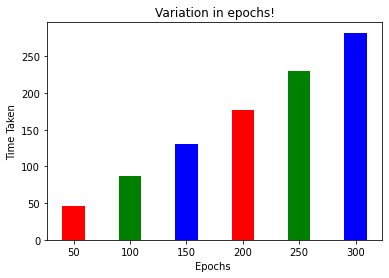

In [75]:
import matplotlib.pyplot as plt

plt.bar( epochs,time_epochs,width = 20, color = ['red', 'green', "blue"])
  
# naming the x-axis
plt.xlabel('Epochs ')
# naming the y-axis
plt.ylabel('Time Taken')
# plot title
plt.title('Variation in epochs!')
  
# function to show the plot
plt.show()

In [76]:
time_batch = []

In [77]:
import time
for i in batch_size:
  start_time = time.time()
  # Adding the output layer
  regressor.add(Dense(units = 1))

  # Compiling the RNN
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

  # Fitting the RNN to the Training set
  history = regressor.fit(X_train, y_train, epochs = 100, batch_size = i )
  time_batch.append(time.time() - start_time)

Epoch 1/100
247/247 [==============================] - 8s 13ms/step - loss: 0.2040
Epoch 2/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0170
Epoch 3/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0035
Epoch 4/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0023
Epoch 5/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0020
Epoch 6/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0017
Epoch 7/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0019
Epoch 8/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0018
Epoch 9/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0012
Epoch 10/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0013
Epoch 11/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0010
Epoch 12/100
247/247 [==============================] - 3s 13ms/step - loss: 0.0011
E

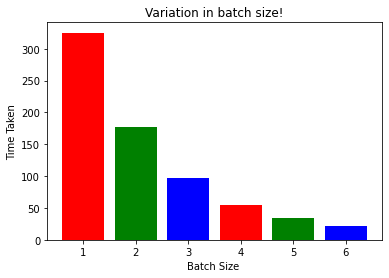

In [83]:
import matplotlib.pyplot as plt

plt.bar( [1,2,3,4,5,6],time_batch,width = 0.8, color = ['red', 'green', "blue"])
  
# naming the x-axis
plt.xlabel('Batch Size ')
# naming the y-axis
plt.ylabel('Time Taken')
# plot title
plt.title('Variation in batch size!')
  
# function to show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.bar( [1,2,3,4,5,6],time_batch,width = 0.8, color = ['red', 'green', "blue"])
  
# naming the x-axis
plt.xlabel('Batch Size ')
# naming the y-axis
plt.ylabel('Time Taken')
# plot title
plt.title('Variation in batch size!')
  
# function to show the plot
plt.show()

In [79]:
time_batch

[325.25278306007385,
 177.21244525909424,
 96.30083227157593,
 54.77957010269165,
 33.96306610107422,
 21.704179525375366]

In [84]:
time_epochs

[46.38532280921936,
 87.28336763381958,
 130.92563438415527,
 177.44652891159058,
 230.8568344116211,
 282.4199450016022]